# Assignment 1: Pixel Regression.

Can we recover an image by learning a deep regression map from pixels $(x,y)$ to colors $(r,g,b)$?

Our target image will be Mona Lisa:

In [46]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.client import device_lib
from tensorflow.keras import metrics

print(tf.__version__)
print(keras.__version__)
print([i.device_type for i in device_lib.list_local_devices()])

1.14.0
2.2.4-tf
['CPU', 'GPU']


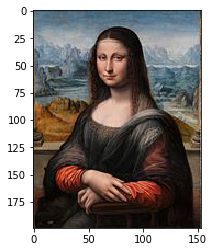

30447

In [47]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

im = mpimg.imread("data/monalisa.jpg")

plt.imshow(im)
plt.show()
im.shape
199*153

Ourt training dataset will be composed of pixels locations and input and pixel values as output:

In [48]:
X_train = []
Y_train = []
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        X_train.append([float(i), float(j)])
        Y_train.append(im[i][j])

X_train = np.array(X_train) / 255
Y_train = np.array(Y_train) / 255
print('Samples:', X_train.shape[0])
print('(x,y):', X_train[1230], '->', '(r,g,b):', Y_train[0])

Samples: 30447
(x,y): [0.03137255 0.02352941] -> (r,g,b): [0.33333333 0.41176471 0.45490196]


Our objective is to train a deep MLP that is able to reconstruct the image:

![alt text](images/result.png)


In [49]:
# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

model = Sequential()
model.add(Dense(64, input_shape=(2, )))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
# model.add(Dropout(0.3))
model.add(Dense(1024))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(2048))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(4096))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

# print model characteristics
model.summary()

model.compile(loss='mean_squared_error',
              optimizer=Adam(),
              metrics=[metrics.mae, metrics.categorical_accuracy])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                192       
_________________________________________________________________
activation_37 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               16640     
_________________________________________________________________
activation_38 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              263168    
_________________________________________________________________
activation_39 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 2048)             

In [43]:
model.fit(X_train, Y_train, epochs=18, shuffle=True, verbose=1, batch_size=64)

Epoch 1/18
30447/30447 [==============================] - 5s 154us/sample - loss: 0.0100 - mean_absolute_error: 0.0673 - categorical_accuracy: 0.8820 - loss: 0.0101 - mean_absol
Epoch 2/18
30447/30447 [==============================] - 5s 154us/sample - loss: 0.0091 - mean_absolute_error: 0.0636 - categorical_accuracy: 0.8774
Epoch 3/18
30447/30447 [==============================] - 5s 161us/sample - loss: 0.0093 - mean_absolute_error: 0.0644 - categorical_accuracy: 0.8829
Epoch 4/18
30447/30447 [==============================] - 5s 157us/sample - loss: 0.0087 - mean_absolute_error: 0.0619 - categorical_accuracy: 0.8830
Epoch 5/18
30447/30447 [==============================] - 5s 154us/sample - loss: 0.0085 - mean_absolute_error: 0.0619 - categorical_accuracy: 0.8843
Epoch 6/18
30447/30447 [==============================] - 5s 157us/sample - loss: 0.0083 - mean_absolute_error: 0.0609 - categorical_accuracy: 0.8834
Epoch 7/18
30447/30447 [==============================] - 5s 158us/sampl

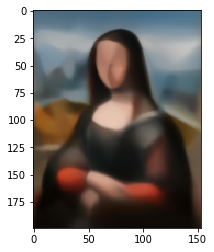

In [45]:
# use this cell to find the best model architecture

Y = model.predict(X_train, batch_size=1000)
k = 0
im_out = im[:].copy()
im_out.setflags(write=1)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i, j] = Y[k] * 255
        k += 1

plt.imshow(im_out)
plt.show()

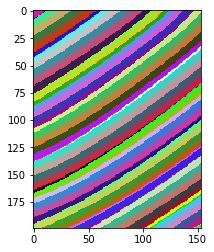


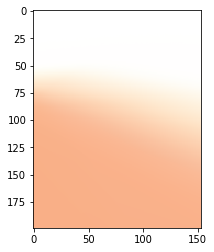

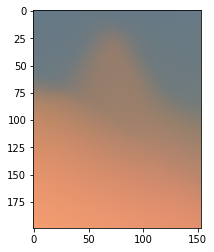

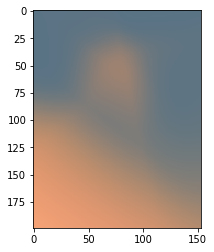

Conclusions:

- batchsize bigger than 10 smaller than 1000
- bigger architecture
- no dorpout

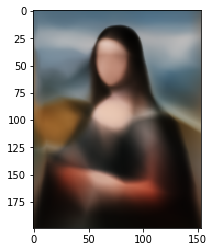

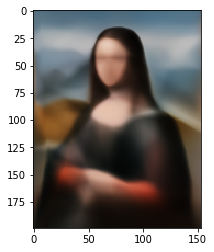

# Final Result

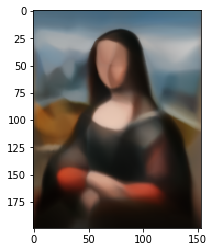